In [1]:
import os 
import rasterio 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from datetime import datetime
from tqdm import tqdm 
import seaborn as sns

In [2]:
# load path input 
path_input = '/mnt/storage/huyekgis/brios/test_data/Data4BRIOS_TEST-20241204T023556Z-001/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/anninh_ndvi8days'
list_path_input = [os.path.join(path_input, path) for path in os.listdir(path_input)]

# load path inference
path_infer = '/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result'
list_path_infer = [os.path.join(path_infer, path) for path in os.listdir(path_infer)]

In [89]:
days = [path.split('_')[-1].split('.')[0] for path in list_path_infer]

In [14]:
len(os.listdir(path_input))

41

In [4]:
list_path_input = sorted(list_path_input, key=lambda x: datetime.strptime(x.split('_')[-1].split('.')[0], '%Y-%m-%d'))
list_path_infer = sorted(list_path_infer, key=lambda x: datetime.strptime(x.split('_')[-1].split('.')[0], '%Y-%m-%d'))

In [5]:
list_path_input[1]

'/mnt/storage/huyekgis/brios/test_data/Data4BRIOS_TEST-20241204T023556Z-001/Data4BRIOS_TEST/AnNinh-QuynhPhu-ThaiBinh/anninh_ndvi8days/anninh_ndvi8days_2022-10-09.tif'

In [6]:
list_path_infer[1]

'/mnt/storage/huyekgis/brios/BRIOS/results/anninh/result/img_2022-10-09.tif'

In [9]:
def transform_tif_to_npy(list_path):
    GT_image = []
    for path in tqdm(list_path, desc="Transform tiff to npy: "):
        with rasterio.open(path) as src:
            data = src.read(1)
            GT_image.append(np.array(data))

    return GT_image

In [11]:
image_input = np.load('/mnt/storage/huyekgis/brios/datasets/TEST_anninh/ndvi_npy/anninh_ndvi8days.npy')

In [12]:
image_input.shape

(464, 396, 46)

In [15]:
# transform to npy 
image_infer = transform_tif_to_npy(list_path_infer)

Transform tiff to npy: 100%|██████████| 46/46 [00:00<00:00, 936.82it/s]


In [16]:
image_infer = np.array(image_infer)

In [17]:
image_infer.shape

(46, 464, 396)

In [19]:
image_infer = image_infer.transpose(1,2,0)

In [20]:
image_infer.shape

(464, 396, 46)

# visualization series random

In [130]:
array1 = image_input[300,260,:]
array2 = image_infer[300,260,:]

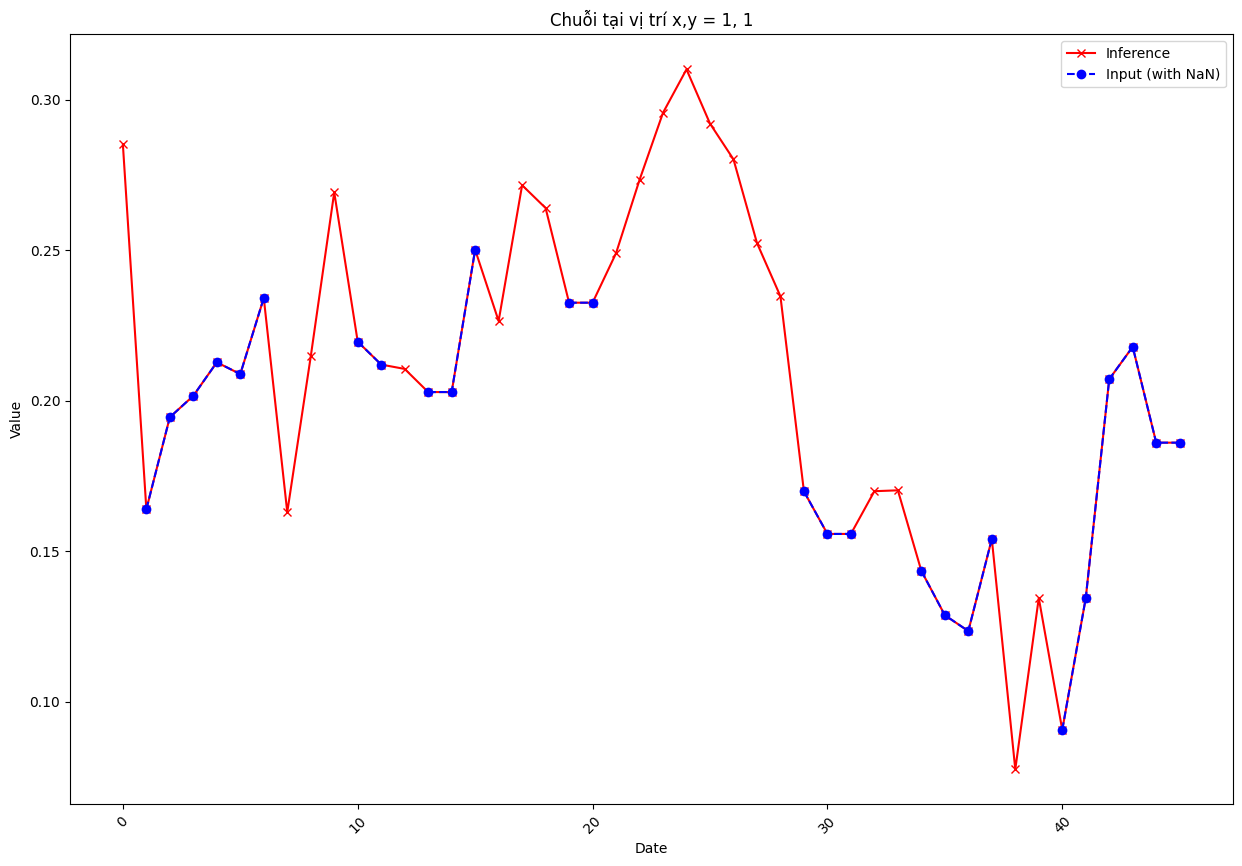

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(15, 10))

# Plot chuỗi thứ hai (array2)
plt.plot(array2, label='Inference', marker='x', color='red')
plt.plot(array1, label='Input (with NaN)', marker='o', color='blue', linestyle='--')

plt.title('Chuỗi tại vị trí x,y = 1, 1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()


plt.xticks(rotation=45)  
plt.show()

# check nan in each series

In [56]:
list_nan = []
input_image_series = image_input.reshape((image_input.shape[0] * image_input.shape[1], image_input.shape[2]))
        

In [57]:
input_image_series.shape

(183744, 46)

In [67]:
input_image_series[1, :]

array([ 0.85988396,  0.85959142,  0.89351499,  0.8046875 ,  0.67164177,
        0.71354914,  0.75847459,  0.75847459,         nan,  0.87133396,
        0.86935639,  0.84935063,         nan,         nan,  0.78064966,
               nan,         nan,         nan,  0.82054859,  0.7674759 ,
        0.70885754,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  0.29035813,  0.29035813,
        0.49636629,  0.49636629,         nan,         nan, -0.00380952,
       -0.00380952,         nan,         nan,         nan,         nan,
        0.00128041,  0.02489627,  0.11748818,  0.21680421,  0.12149533,
        0.30938944])

In [70]:
list_nan = []
for i in range(input_image_series.shape[0]):
    list_nan.append(np.sum(np.isnan(input_image_series[i, :]))/46)

In [103]:
list_nan_follow_by_date = []
for i in range(input_image_series.shape[1]):
    list_nan_follow_by_date.append(np.sum(np.isnan(input_image_series[:, i]))/183744 * 100)

In [104]:
list_nan_follow_by_date

[np.float64(69.75357018460467),
 np.float64(20.03276297457332),
 np.float64(16.130594740508535),
 np.float64(16.193181818181817),
 np.float64(16.198624172762106),
 np.float64(16.081613549285965),
 np.float64(37.804771856496),
 np.float64(87.09291187739464),
 np.float64(100.0),
 np.float64(16.114811912225704),
 np.float64(16.14746603970742),
 np.float64(16.066374956461164),
 np.float64(100.0),
 np.float64(87.42598397770811),
 np.float64(16.101206025774992),
 np.float64(16.076715430163706),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(30.021660571229535),
 np.float64(16.28842302333682),
 np.float64(16.23889759665622),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(99.99891152908394),
 np.float64(99.99891152908394),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(99.46175113200975),
 np.float64(16.191004876349705),
 np.float64(16.14637756879136),
 np.float64(17.627786485545105),
 np.float64(17.230494601184258),
 np.float64(82.22254876349704),
 np.float64(77.62648032044584)

In [71]:
list_nan

[np.float64(0.41304347826086957),
 np.float64(0.41304347826086957),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.391304347826087),
 np.float64(0.43478260869565216),
 np.float64(0.43478260869565216),
 np.float64(0.45652173913043476),
 np.float64(0.45652173913043476),
 np.float64(0.4782608695652174),
 np.float64(0.5652173913043478),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5434782608695652),
 np.float64(0.5217391304347826),
 np.float64(0.54

<Axes: ylabel='Count'>

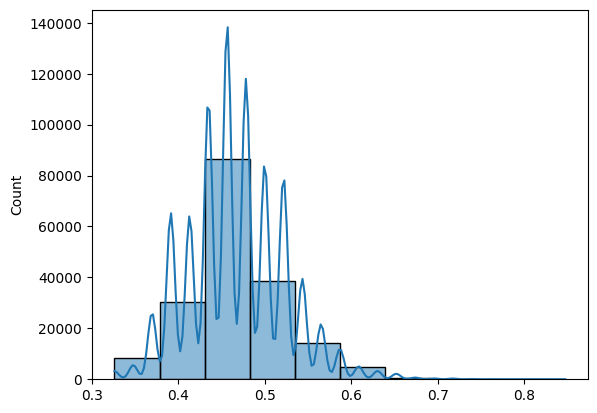

In [119]:
sns.histplot(list_nan, kde=True, bins=10)

In [76]:
max(list_nan)

np.float64(0.8478260869565217)

In [133]:
index_nan_lower_than_40 = [i for i, value in enumerate(list_nan) if value < 0.4]
index_nan_lower_than_60 = [i for i, value in enumerate(list_nan) if value >= 0.4 and value < 0.6]
index_nan_lower_than_80 = [i for i, value in enumerate(list_nan) if value > 0.6 and value <= 0.8]
index_nan_lower_than_100 = [i for i, value in enumerate(list_nan) if value > 0.8]

In [ ]:
np.save(index_nan_lower_than_80)

In [87]:
len(list_nan_follow_by_date)

46

In [88]:
len(days)

41

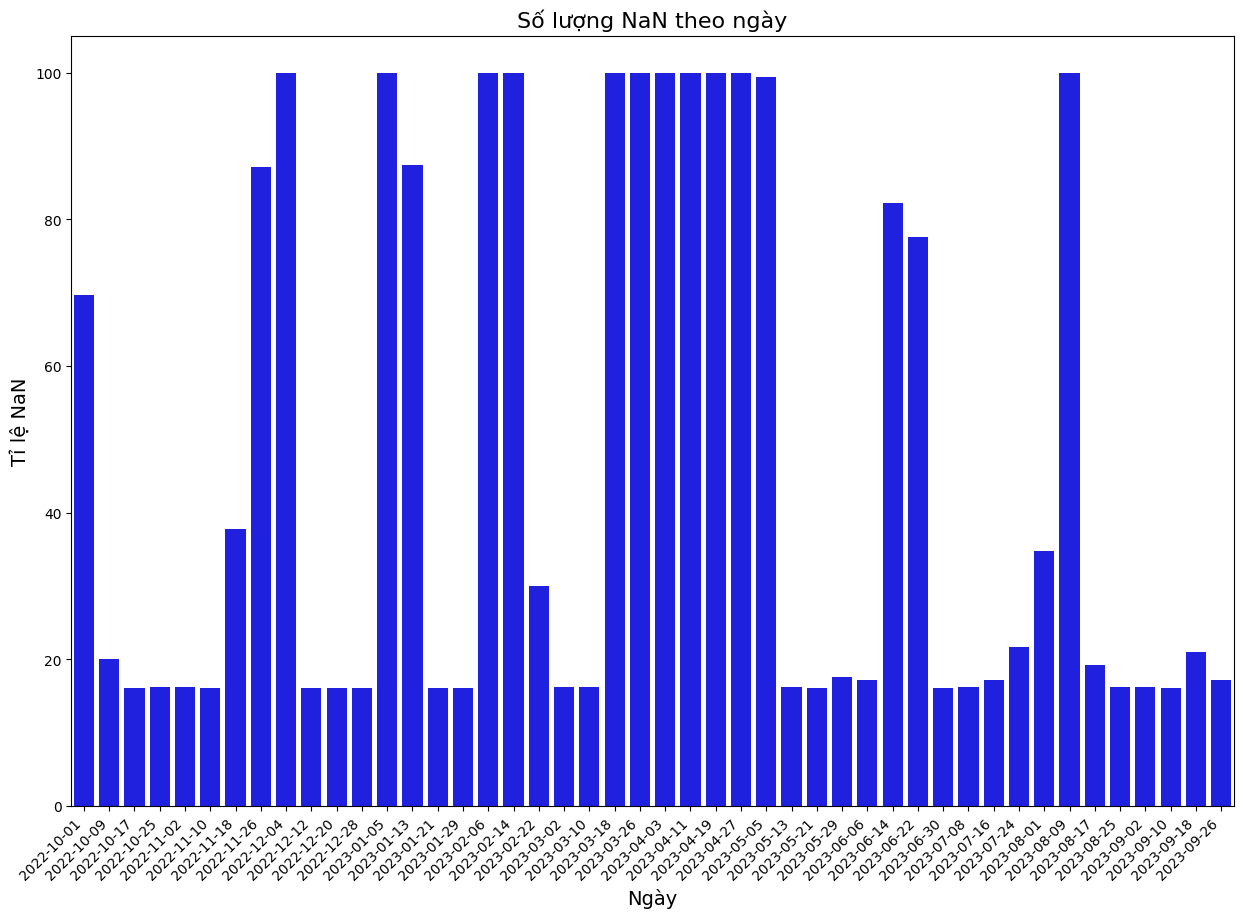

In [116]:
plt.figure(figsize=(15, 10))

sns.barplot(x=days, y=list_nan_follow_by_date, color='blue')

plt.title('Số lượng NaN theo ngày', fontsize=16)
plt.xlabel('Ngày', fontsize=14)
plt.ylabel('Tỉ lệ NaN', fontsize=14)
plt.xticks(rotation=45, ha='right') 

plt.show()

/tmp/ipykernel_15332/3026787858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(list_nan_follow_by_date,palette=sns.color_palette("Set2"))
/tmp/ipykernel_15332/3026787858.py:1: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(list_nan_follow_by_date,palette=sns.color_palette("Set2"))


<Axes: >

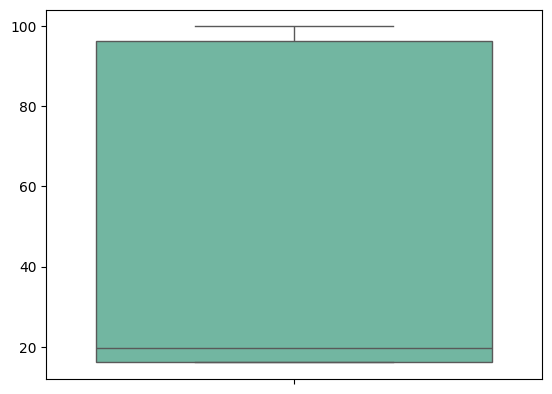

In [113]:
sns.boxplot(list_nan_follow_by_date,palette=sns.color_palette("Set2"))

In [8]:
df = np.load('/mnt/storage/huyekgis/brios/BRIOS/results/daphuoc/test_daphuoc.npy')

In [9]:
df.shape

(741, 445, 46)

In [10]:
df[0]

array([[ 0.60636866,  0.82548887,  0.80673659, ...,  0.66035181,
         0.74822831,  0.807944  ],
       [ 0.59380287,  0.80234241,  0.80485117, ...,  0.68393272,
         0.75651765,  0.79987532],
       [ 0.58280247,  0.77954948,  0.79504925, ...,  0.6871658 ,
         0.7650944 ,  0.81610918],
       ...,
       [ 0.0754576 , -0.2904309 , -0.33175915, ...,  0.1338983 ,
        -0.05901515, -0.61494905],
       [ 0.10414004, -0.22499999, -0.14563107, ...,  0.11315548,
        -0.07051659, -0.6119734 ],
       [ 0.09934443, -0.22499999, -0.14563107, ...,  0.11315548,
        -0.07677412, -0.6119734 ]])

In [ ]:
import rasterio 